In [29]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import glob
import statistics
import math

from utils import *

# Gradient Descent

## Linear Regression 

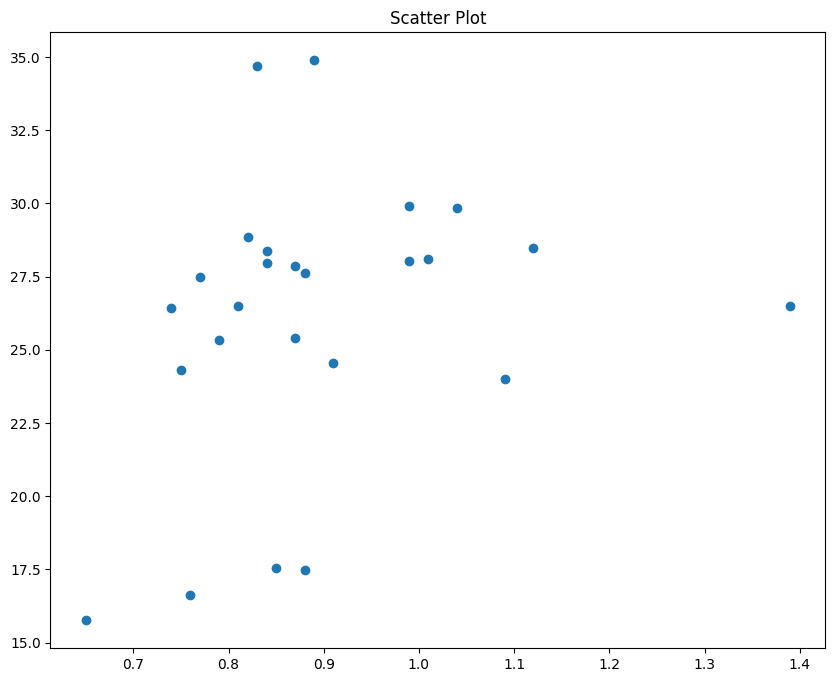

In [30]:
df = pd.read_csv('datasets/diabetes.csv')

df = df.head(25)

x = df['WHR']
y = df['BMI']

plt.figure(figsize = (10,8)) # Scatter plot size
plt.scatter(x = x, y = y) # x-y values
plt.title('Scatter Plot')

plt.show()

## Finding residuals 

### Sum of Squared Residuals  
### $$SSR = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$  

---

## - **Summation symbol**  
####  $$\sum$$  
####  Sum of all squared residuals from **i = 1** to **n**

## - **Actual observed value**  
####  $$ y_i $$  
####  Actual observed value of the dependent variable at the \( i \)-th data point. AKA the y value from data points.

## - **Predicted value**  
####  $$ \hat{y}_i $$  
####  Predicted value of the dependent variable at the \( i \)-th data point. AKA the y value of the line we're trying to create

---

## Simplified Version  
### $$(y - y_1)^2 + (y - y_2)^2 + \dots + (y - y_n)^2$$  

### Where **(n)** is the total number of data points.  

## Testing a basic line to find residuals

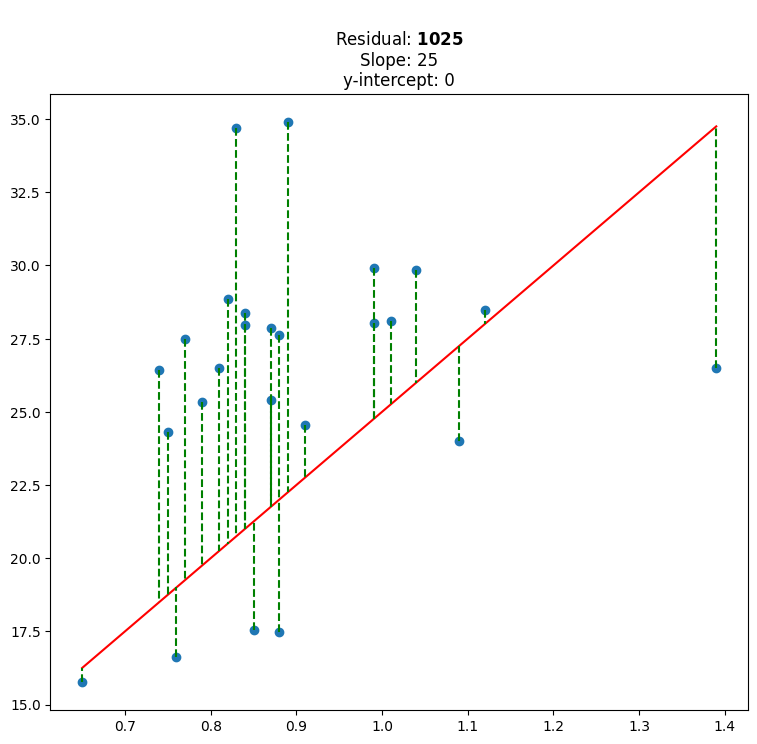

In [31]:
graph_1 = residual_scatter(x = x, y = y, m = 25, yintercept = 0)[0]

graph_1.show()

### - Green dashed lines are the residuals visualized
### - Red line is the predicted value 
### - Goal is to decrease the residuals (green dots) as much as possible, in the fastest way possible

## Finding the best fitting line in the fastest way by taking the partial derivatives with respect to the slope (m) and y intercept (b)

### In the simplified version we have this function:
### $$(y - y_1)^2 + (y - y_2)^2 + \dots + (y - y_n)^2$$  
### $$(y - y_1)^2 = (y - (mx + b))^2 $$

--- 
### Paritial Derivatives with respect to slope and y intercept
### $$ \frac{d}{dx}m = -2x(y - (mx + b)) $$
### $$ \frac{d}{dx}b = -2(y - (mx + b)) $$

### Final partial derivatives would like like this:
### $$\frac{d}{dx}m = -2x(y - (mx + b)_1) + -2x(y - (mx + b)_2) + \dots + -2x(y - (mx + b)_n)$$  
### $$\frac{d}{dx}b = -2(y - (mx + b)_1) + -2(y - (mx + b)_2) + \dots + -2(y - (mx + b)_n)$$  

### After finding the partial derivatives we use both equations to plug in our x, slope (m) and y intercept (b) values
### Then we divide the partial derivatives by **n**, aka the number of data points 
### $$ \frac{d}{dx}m \div n $$
### $$ \frac{d}{dx}b \div n $$
### Then multiple a learning rate by the partial derivatives
### $$ New \frac{d}{dx}m = Learning Rate \times  \frac{d}{dx}m $$
### $$ New \frac{d}{dx}b = Learning Rate \times  \frac{d}{dx}b $$
### Finally subtract the **new slope** by the **old slope**
### $$ m = New \frac{d}{dx}m - Old \frac{d}{dx}m$$
### $$ b = New \frac{d}{dx}b - Old \frac{d}{dx}b$$

### This process repeats until the specified epoch is reached or the difference between new slope and old slope is less than the learning rate

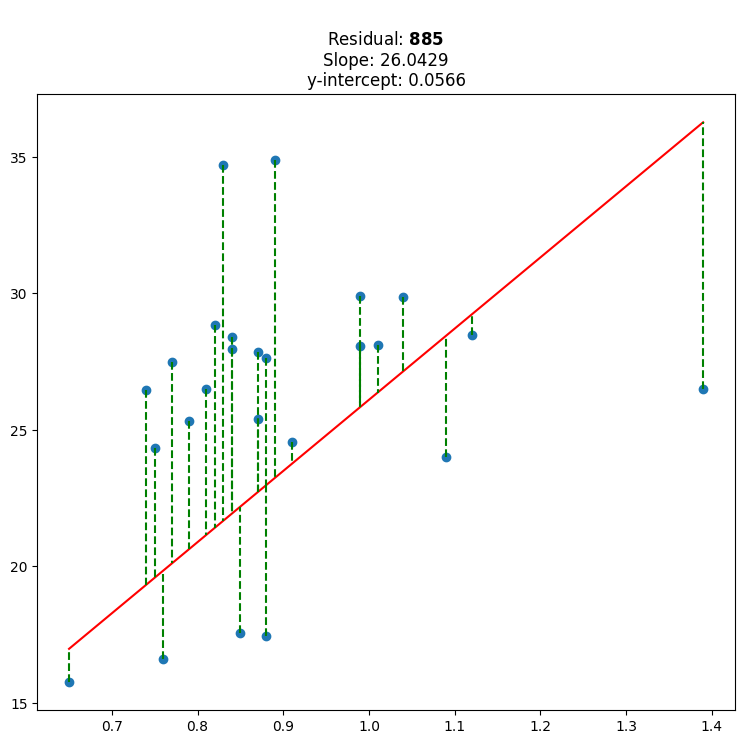

In [32]:
m, b = gradient(x = x, y = y, m = 26, b = 0)

gradient_1 = residual_scatter(x = x, y = y, m = m, yintercept = b)[0]
gradient_1.show()

### Less residuals and different slope and y intercept

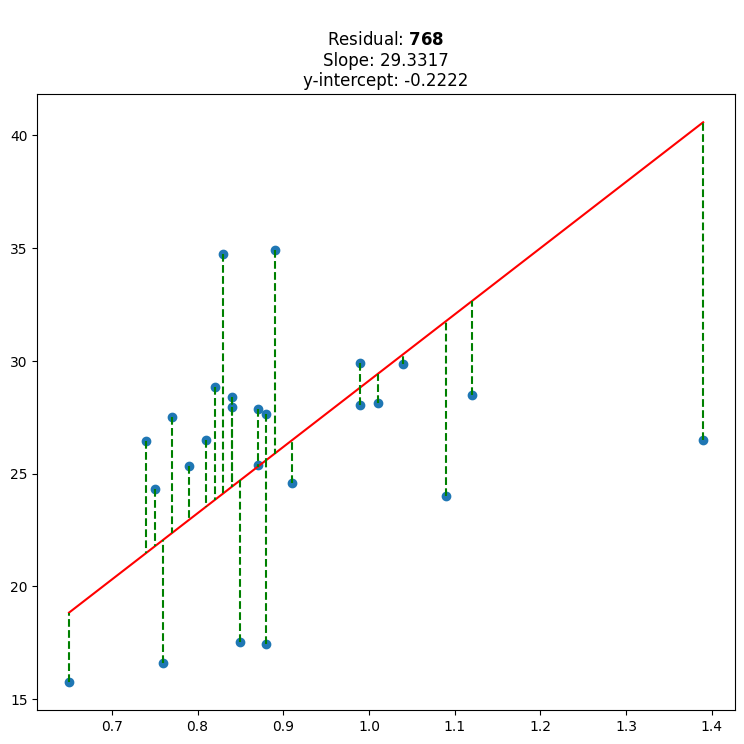

In [33]:
m, b = gradient_descent(x = x, y = y, m = 30, b =  0, epoch = 5000, learning_rate = 0.0001)

res_graph = residual_scatter(x = x, y = y, m = m, yintercept = b, line = 'slope')[0]
res_graph.show()

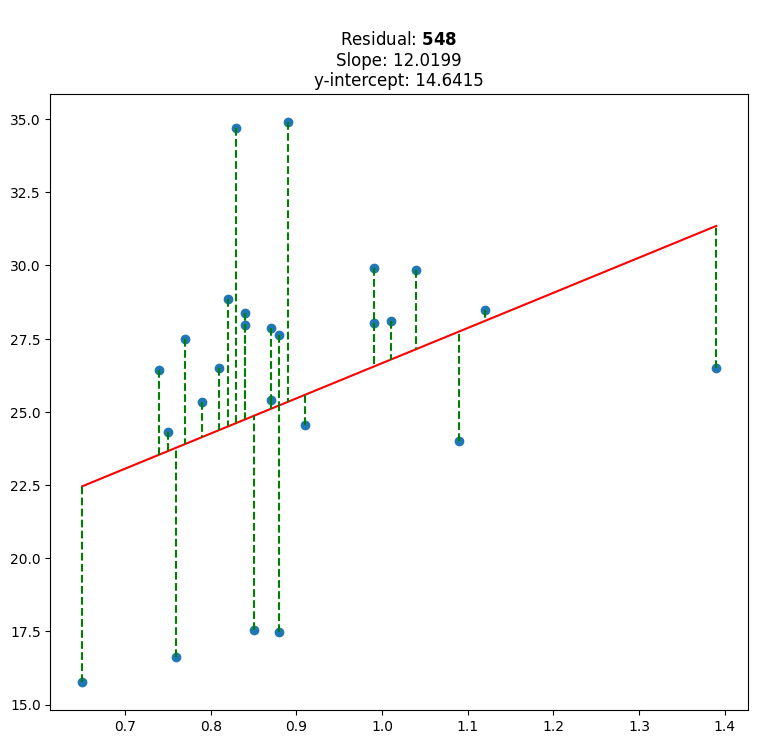

In [34]:
m, b = gradient_descent(x = x, y = y, m = 0, b =  1.2, epoch = 10000, learning_rate = 0.0001)

res_graph = residual_scatter(x = x, y = y, m = m, yintercept = b, line = 'slope')[0]
res_graph.show()

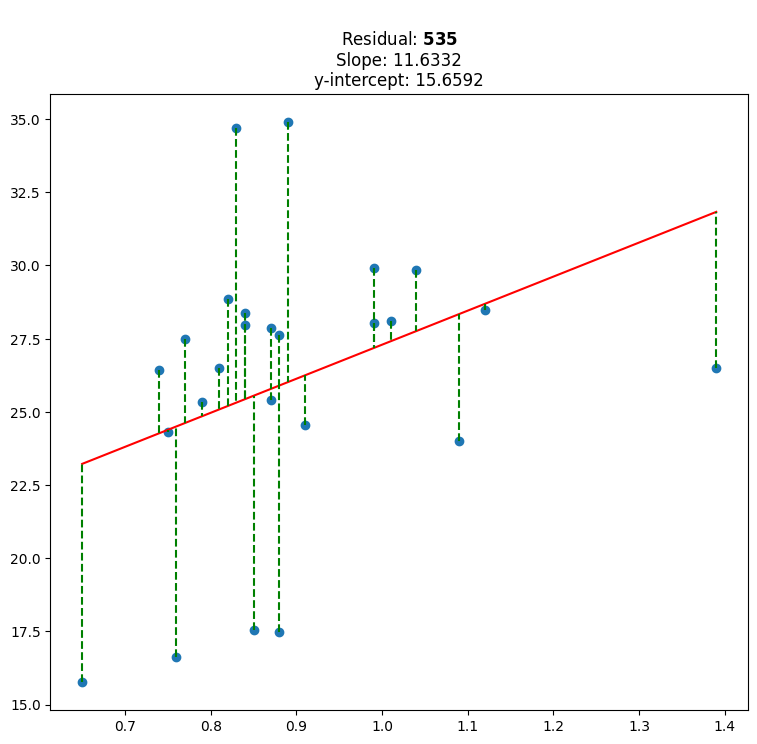

In [35]:
m, b = gradient_descent(x = x, y = y, m = 0, b =  1.2, epoch = 100000, learning_rate = 0.0001)

res_graph = residual_scatter(x = x, y = y, m = m, yintercept = b, line = 'slope')[0]
res_graph.show()